VALIDACIÓN CON BENCHMARK - SISTEMA DE DOS ESPECIES
Condiciones iniciales: x0 = 1.0, y0 = 0.5
Tiempo de evaluación: t = 5.0
Tamaño de paso: h = 0.1

SOLUCIÓN ANALÍTICA:
x(5.0) = 1.482053
y(5.0) = 0.547612

MÉTODO DE EULER:
x(5.0) = 1.467342 (Error: 1.47e-02)
y(5.0) = 0.544699 (Error: 2.91e-03)

MÉTODO RUNGE-KUTTA 4:
x(5.0) = 1.470026 (Error: 1.20e-02)
y(5.0) = 0.545698 (Error: 1.91e-03)


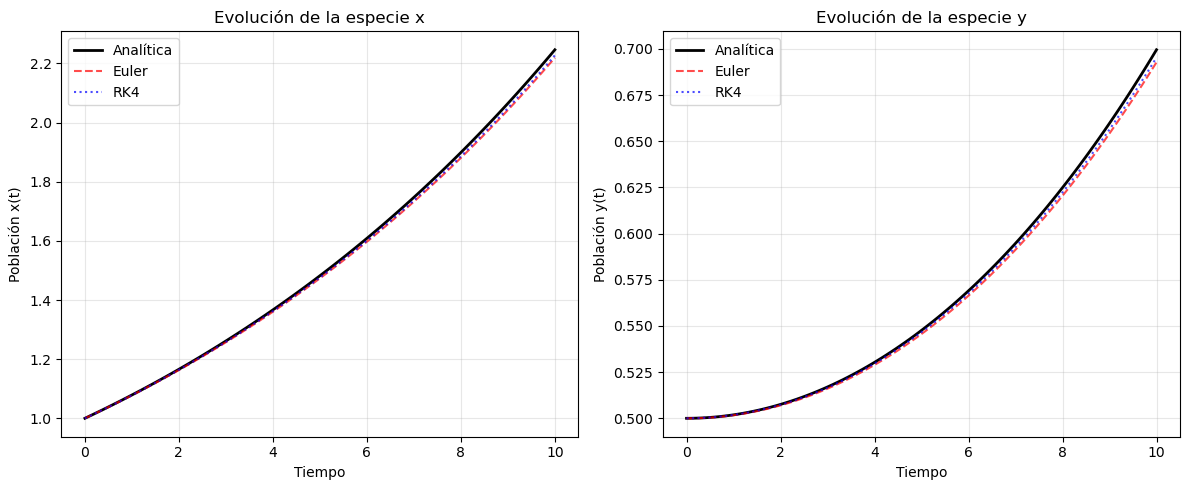

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sistema(t, variables):
    x, y = variables
    dxdt = 0.1*x - 0.05*y
    dydt = 0.05*x - 0.1*y
    return np.array([dxdt, dydt])

def solucion_analitica(t, x0, y0):
    """Solución analítica del sistema lineal"""
    sqrt3 = np.sqrt(3)
    lambda1 = sqrt3/20
    lambda2 = -sqrt3/20
    
    # Vectores propios
    v1 = np.array([1, 2 - sqrt3])
    v2 = np.array([1, 2 + sqrt3])
    
    # Constantes a partir de condiciones iniciales
    A = np.column_stack((v1, v2))
    constants = np.linalg.solve(A, [x0, y0])
    c1, c2 = constants
    
    # Solución
    x_t = c1 * np.exp(lambda1 * t) + c2 * np.exp(lambda2 * t)
    y_t = c1 * (2 - sqrt3) * np.exp(lambda1 * t) + c2 * (2 + sqrt3) * np.exp(lambda2 * t)
    
    return x_t, y_t

def euler_sistema(cond_inicial, t_span, h):
    """Método de Euler para sistemas"""
    t0, tf = t_span
    n_steps = int((tf - t0) / h)
    t = np.linspace(t0, tf, n_steps)
    x = np.zeros(n_steps)
    y = np.zeros(n_steps)
    x[0], y[0] = cond_inicial
    
    for i in range(n_steps - 1):
        dxdt, dydt = sistema(t[i], [x[i], y[i]])
        x[i + 1] = x[i] + h * dxdt
        y[i + 1] = y[i] + h * dydt
    
    return t, x, y

def rk4_sistema(cond_inicial, t_span, h):
    """Método Runge-Kutta 4 para sistemas"""
    t0, tf = t_span
    n_steps = int((tf - t0) / h)
    t = np.linspace(t0, tf, n_steps)
    x = np.zeros(n_steps)
    y = np.zeros(n_steps)
    x[0], y[0] = cond_inicial
    
    for i in range(n_steps - 1):
        k1 = h * sistema(t[i], [x[i], y[i]])
        k2 = h * sistema(t[i] + h/2, [x[i] + k1[0]/2, y[i] + k1[1]/2])
        k3 = h * sistema(t[i] + h/2, [x[i] + k2[0]/2, y[i] + k2[1]/2])
        k4 = h * sistema(t[i] + h, [x[i] + k3[0], y[i] + k3[1]])
        
        x[i + 1] = x[i] + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0]) / 6
        y[i + 1] = y[i] + (k1[1] + 2*k2[1] + 2*k3[1] + k4[1]) / 6
    
    return t, x, y

# Validación con benchmark
def validar_metodos():
    x0, y0 = 1.0, 0.5
    t_span = (0, 10)
    h = 0.1
    t_eval = 5.0
    
    # Solución analítica
    x_analitico, y_analitico = solucion_analitica(t_eval, x0, y0)
    
    # Método de Euler
    t_euler, x_euler, y_euler = euler_sistema([x0, y0], t_span, h)
    idx = np.argmin(np.abs(t_euler - t_eval))
    x_euler_val = x_euler[idx]
    y_euler_val = y_euler[idx]
    
    # Método RK4
    t_rk4, x_rk4, y_rk4 = rk4_sistema([x0, y0], t_span, h)
    idx = np.argmin(np.abs(t_rk4 - t_eval))
    x_rk4_val = x_rk4[idx]
    y_rk4_val = y_rk4[idx]
    
    print("VALIDACIÓN CON BENCHMARK - SISTEMA DE DOS ESPECIES")
    print("=" * 60)
    print(f"Condiciones iniciales: x0 = {x0}, y0 = {y0}")
    print(f"Tiempo de evaluación: t = {t_eval}")
    print(f"Tamaño de paso: h = {h}")
    print()
    
    print("SOLUCIÓN ANALÍTICA:")
    print(f"x({t_eval}) = {x_analitico:.6f}")
    print(f"y({t_eval}) = {y_analitico:.6f}")
    print()
    
    print("MÉTODO DE EULER:")
    print(f"x({t_eval}) = {x_euler_val:.6f} (Error: {abs(x_euler_val - x_analitico):.2e})")
    print(f"y({t_eval}) = {y_euler_val:.6f} (Error: {abs(y_euler_val - y_analitico):.2e})")
    print()
    
    print("MÉTODO RUNGE-KUTTA 4:")
    print(f"x({t_eval}) = {x_rk4_val:.6f} (Error: {abs(x_rk4_val - x_analitico):.2e})")
    print(f"y({t_eval}) = {y_rk4_val:.6f} (Error: {abs(y_rk4_val - y_analitico):.2e})")
    
    # Gráfico comparativo
    t_analitico = np.linspace(0, 10, 100)
    x_analitico_full, y_analitico_full = solucion_analitica(t_analitico, x0, y0)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(t_analitico, x_analitico_full, 'k-', label='Analítica', linewidth=2)
    plt.plot(t_euler, x_euler, 'r--', label='Euler', alpha=0.7)
    plt.plot(t_rk4, x_rk4, 'b:', label='RK4', alpha=0.7)
    plt.xlabel('Tiempo')
    plt.ylabel('Población x(t)')
    plt.title('Evolución de la especie x')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(t_analitico, y_analitico_full, 'k-', label='Analítica', linewidth=2)
    plt.plot(t_euler, y_euler, 'r--', label='Euler', alpha=0.7)
    plt.plot(t_rk4, y_rk4, 'b:', label='RK4', alpha=0.7)
    plt.xlabel('Tiempo')
    plt.ylabel('Población y(t)')
    plt.title('Evolución de la especie y')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Ejecutar validación
validar_metodos()